In [1]:
from strategy import DualReallocationStrategy
import vectorbt as vbt
import dffc

codes = ['007467', '004253']
names=['HL', 'GD']
start_date = '2022-07-01'
end_date = '2025-07-01'

fund_data = dffc.FundData.download(
    codes,
    names=names,
    start=start_date,
    end=end_date
)

price_data = fund_data.get('cumulative_value')

d:\anaconda3\envs\quant\Lib\site-packages\telegram\utils\request.py:54: UserWarning:

python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.



In [2]:
strategy = DualReallocationStrategy(
    prices = price_data,
    adjust_factor=0.2,
    rebalance_freq='D',  # 日度再平衡
    default_weights = [0.5, 0.5],
    up_weights = [0.2, 0.8],
    down_weights= [0.8, 0.2], 
    threshold=0.6,
    optimization=True
    # hw_params_list = config_data
)


Optimizing Holt-Winters parameters...
开始处理 2 个基金...
处理基金 1/2: 007467


Optimizing seasons: 100%|██████████| 18/18 [00:06<00:00,  2.96it/s]


  基金 007467 处理完成！参数: Alpha=0.088548, Beta=0.000000, Gamma=0.123289, Season=24
处理基金 2/2: 004253


Optimizing seasons: 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]


  基金 004253 处理完成！参数: Alpha=0.074058, Beta=0.005622, Gamma=0.503817, Season=15

批量处理完成!
成功处理: 2 个基金
处理失败: 0 个基金
汇总结果保存在: .\processing_summary.csv
Generating target weight series...


In [3]:
portfolio, rebalance_mask, actual_weights = strategy.run_backtest(initial_cash=100000, fees = 0.001)

Preparing backtest data...
Total rebalancing count: 518
Running vectorbt backtest...



=== Rebalancing Strategy Performance Analysis ===
Total Return(%): 69.99
Sharpe Ratio: 1.78
Max Drawdown(%): -8.51

Detailed Statistics:
Start                           2022-07-01 00:00:00+08:00
End                             2025-07-01 00:00:00+08:00
Period                                  730 days 00:00:00
Start Value                                      100000.0
End Value                                   169990.316262
Total Return [%]                                69.990316
Benchmark Return [%]                            63.116906
Max Gross Exposure [%]                              100.0
Total Fees Paid                               4536.541039
Max Drawdown [%]                                 8.511816
Max Drawdown Duration                    92 days 00:00:00
Total Trades                                          519
Total Closed Trades                                   517
Total Open Trades                                       2
Open Trade PnL                                7965

d:\Projects\quant\quant_dffc\wxy_backtest\hw_dual_reallocation\strategy.py:320: UserWarning:

Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.

d:\Projects\quant\quant_dffc\wxy_backtest\hw_dual_reallocation\strategy.py:320: UserWarning:

Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.

d:\anaconda3\envs\quant\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.

d:\anaconda3\envs\quant\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.



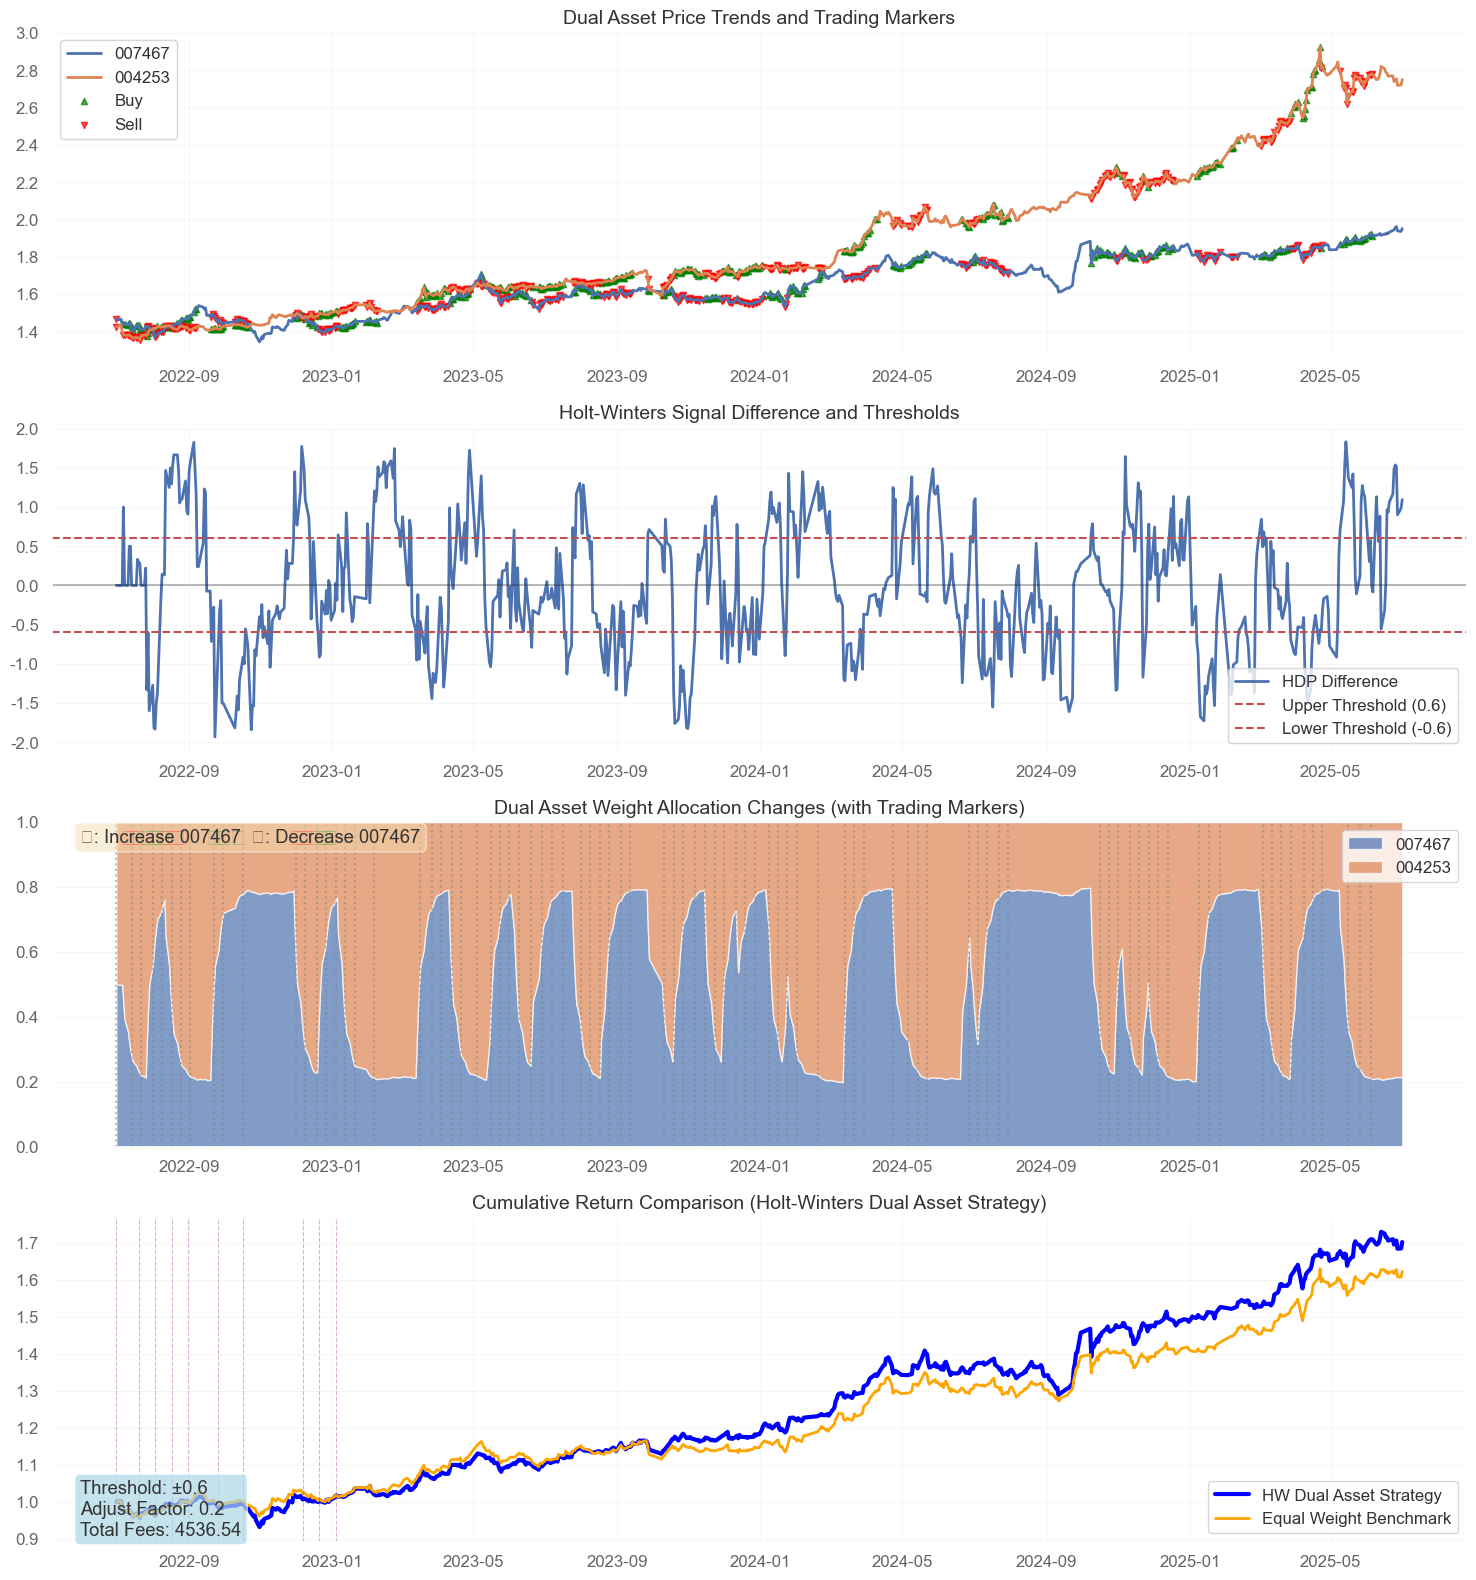


=== Dual Asset HW Strategy Statistics ===
Threshold setting: ±0.6
Weight configuration: Default[0.5 0.5], Up[0.2 0.8], Down[0.8 0.2]
HW optimization: Yes
Signal distribution: Up 182 days (24.9%), Down 176 days (24.1%), Neutral 372 days (51.0%)
Rebalancing count: 518
Average rebalancing interval: 1.4 days


In [4]:
# 分析结果
stats = strategy.analyze_results(portfolio)

# 绘制结果
strategy.plot_results(portfolio, rebalance_mask)

In [ ]:
strategy.hw_params_list